In [27]:
from get_trap_incidences import TRAPIncidences
import pandas as pd
from constants import *
import numpy as np
import matplotlib.pyplot as plt

In [7]:
trap_data = TRAPIncidences(of='CHILD').read()
trap_data['State'] = trap_data['State'].replace("D.C.", "District Of Columbia")

In [8]:
epa_region = pd.read_csv("data/states_and_counties.csv")
epa_region = epa_region[['State Name','State Code', "EPA Region"]]
epa_region = epa_region[epa_region['State Code'] != 'CC']
epa_region['State Code'] = epa_region['State Code'].apply(int)
epa_region = epa_region.drop_duplicates(['State Code'], keep='first')
mdf = trap_data.merge(epa_region, left_on="State", right_on="State Name", how='left')

In [24]:
zev_af = mdf[mdf['State Code'].isin(ZEV_STATES)][["AF"]]["AF"].tolist()
others_af = mdf[(~mdf['State Code'].isin(ZEV_STATES)) & (~mdf['State Code'].isin(EXCLUDE_STATES))][["AF"]]["AF"].tolist()

{'whiskers': [<matplotlib.lines.Line2D at 0x17dcc2c0d00>,
 'caps': [<matplotlib.lines.Line2D at 0x17dcc2c1360>,
 'boxes': [<matplotlib.lines.Line2D at 0x17dcc2c0a30>,
 'medians': [<matplotlib.lines.Line2D at 0x17dcc2c1840>,
 'fliers': [<matplotlib.lines.Line2D at 0x17dcc2c1b10>,
 'means': []}

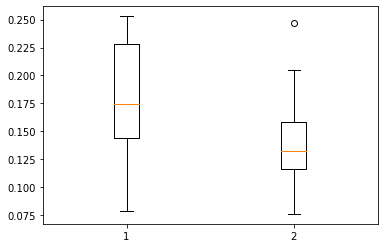

In [28]:
plt.boxplot([zev_af, others_af])

In [31]:
mdf[(~mdf['State Code'].isin(ZEV_STATES)) & (~mdf['State Code'].isin(EXCLUDE_STATES))]

,State,AF,State Name,State Code,EPA Region
0,NaN,0.176,NaN,NaN,NaN
1,Alabama,0.118,Alabama,1.0,4.0
3,Arkansas,0.116,Arkansas,5.0,6.0
9,Florida,0.127,Florida,12.0,4.0
10,Georgia,0.145,Georgia,13.0,4.0
11,Idaho,0.126,Idaho,16.0,10.0
12,Illinois,0.247,Illinois,17.0,5.0
13,Indiana,0.181,Indiana,18.0,5.0
14,Iowa,0.124,Iowa,19.0,7.0
15,Kansas,0.136,Kansas,20.0,7.0
